In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
from keras.models import Sequential
from keras.layers import Dense, Dropout , Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator,image
from keras import optimizers

from keras import backend as K

Using TensorFlow backend.


In [2]:
#mini batch gradient descent ftw
batch_size = 128
#10 difference characters
num_classes = 10
#very short training time
epochs = 5

# input image dimensions
#28x28 pixel images. 
img_rows, img_cols = 28, 28

In [3]:
# Downloads digits dataset from keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Name of classes
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

In [5]:
x_train = x_train / 255.0

x_test = x_test / 255.0

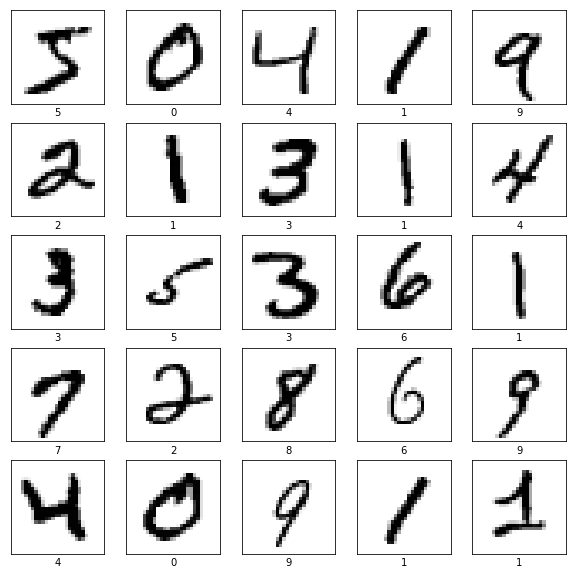

In [6]:
# Plotting some dataset from training with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

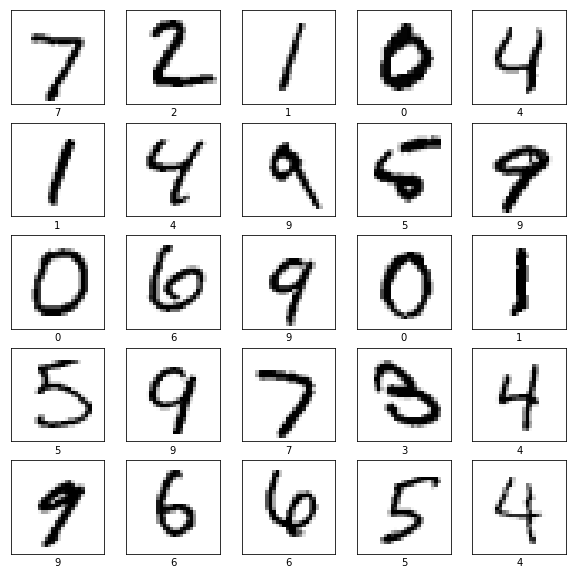

In [7]:
# Plotting some dataset from testing with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])

In [8]:
# Dataset Processing
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# CNN model layering 
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
# Adding loss functions and optimizers to CNN model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Starting training
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 44s 731us/step - loss: 1.3137 - acc: 0.5489 - val_loss: 0.4343 - val_acc: 0.8745
Epoch 2/5
60000/60000 [==============================] - 47s 780us/step - loss: 0.5565 - acc: 0.8257 - val_loss: 0.2745 - val_acc: 0.9175
Epoch 3/5
60000/60000 [==============================] - 46s 771us/step - loss: 0.4117 - acc: 0.8743 - val_loss: 0.1929 - val_acc: 0.9418
Epoch 4/5
60000/60000 [==============================] - 49s 819us/step - loss: 0.3248 - acc: 0.9022 - val_loss: 0.1486 - val_acc: 0.9536
Epoch 5/5
60000/60000 [==============================] - 49s 824us/step - loss: 0.2681 - acc: 0.9197 - val_loss: 0.1206 - val_acc: 0.9629


In [13]:
# Evalaluating model with validation dataset i.e test dataset in this case
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 196us/step
Test accuracy: 0.9629


In [14]:
# Making predections on test dataset
predictions = model.predict(x_test)

In [15]:
# Taking prediction of dataset at index 0
predictions[0]

array([5.9637955e-08, 2.6172682e-08, 7.1912209e-06, 2.0364023e-05,
       1.6466070e-10, 3.9818207e-10, 3.8503058e-14, 9.9985111e-01,
       1.4864639e-08, 1.2126683e-04], dtype=float32)

In [16]:
# Taking out dataset that has higer probability
np.argmax(predictions[0])

7

<p>For verification, check label of dataset at index 0 on plotting test dataset</p>